In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

In [13]:
filepath = "../data/50%.csv"  # Update this path accordingly
df = pd.read_csv(filepath)

df.columns

Index(['Unnamed: 0', 'cpu_0_freq_cur', 'cpu_0_freq_max', 'cpu_0_freq_min',
       'cpu_0_governor', 'cpu_0_idle', 'cpu_0_idle_state_WFI',
       'cpu_0_idle_state_c7', 'cpu_0_info_freq_cur', 'cpu_0_info_freq_max',
       ...
       'temperature_AO_temp', 'temperature_CPU_online', 'temperature_CPU_temp',
       'temperature_GPU_online', 'temperature_GPU_temp',
       'temperature_PLL_online', 'temperature_PLL_temp',
       'temperature_thermal_online', 'temperature_thermal_temp', 'uptime'],
      dtype='object', length=134)

In [18]:
df.describe()

,Unnamed: 0,cpu_0_freq_cur,cpu_0_freq_max,cpu_0_freq_min,cpu_0_idle,cpu_0_idle_state_WFI,cpu_0_idle_state_c7,cpu_0_info_freq_cur,cpu_0_info_freq_max,cpu_0_info_freq_min,cpu_0_nice,cpu_0_system,cpu_0_user,cpu_1_freq_cur,cpu_1_freq_max,cpu_1_freq_min,cpu_1_idle,cpu_1_idle_state_WFI,cpu_1_idle_state_c7,cpu_1_info_freq_cur,cpu_1_info_freq_max,cpu_1_info_freq_min,cpu_1_nice,cpu_1_system,cpu_1_user,cpu_2_freq_cur,cpu_2_freq_max,cpu_2_freq_min,cpu_2_idle,cpu_2_idle_state_WFI,cpu_2_idle_state_c7,cpu_2_info_freq_cur,cpu_2_info_freq_max,cpu_2_info_freq_min,cpu_2_nice,cpu_2_system,cpu_2_user,cpu_3_freq_cur,cpu_3_freq_max,cpu_3_freq_min,cpu_3_idle,cpu_3_idle_state_WFI,cpu_3_idle_state_c7,cpu_3_info_freq_cur,cpu_3_info_freq_max,cpu_3_info_freq_min,cpu_3_nice,cpu_3_system,cpu_3_user,engines_SE_cur,fan_tegrapwm_rpm,fan_tegrapwm_speed,gpu_freq,gpu_power_control,gpu_status,gpu_type,mem_EMC_cur,mem_EMC_online,mem_EMC_override,mem_EMC_val,mem_IRAM_lfb,mem_IRAM_tot,mem_IRAM_used,mem_RAM_buffers,mem_RAM_cached,mem_RAM_free,mem_RAM_lfb,mem_RAM_shared,mem_RAM_tot,mem_RAM_used,mem_SWAP_cached,mem_SWAP_table,mem_SWAP_tot,mem_SWAP_used,power_rail,power_rail_POM_5V_CPU_avg,power_rail_POM_5V_CPU_crit,power_rail_POM_5V_CPU_curr,power_rail_POM_5V_CPU_power,power_rail_POM_5V_CPU_volt,power_rail_POM_5V_CPU_warn,power_rail_POM_5V_GPU_avg,power_rail_POM_5V_GPU_crit,power_rail_POM_5V_GPU_curr,power_rail_POM_5V_GPU_power,power_rail_POM_5V_GPU_volt,power_rail_POM_5V_GPU_warn,processes_0_0,processes_0_4,processes_0_6,processes_0_7,processes_0_8,processes_1_0,processes_1_4,processes_1_6,processes_1_7,processes_1_8,temperature_AO_temp,temperature_CPU_temp,temperature_GPU_temp,temperature_PLL_temp,temperature_thermal_temp,uptime
count,2253.0000,2253.0,2253.0,2253.0,2253.000000,2253.0,2253.0,2253.0,2253.0,2253.0,2253.0,2253.000000,2253.000000,2253.0,2253.0,2253.0,2253.000000,2253.0,2253.0,2253.0,2253.0,2253.0,2253.0,2253.000000,2253.000000,2253.0,2253.0,2253.0,2253.000000,2253.0,2253.0,2253.0,2253.0,2253.0,2253.0,2253.000000,2253.000000,2253.0,2253.0,2253.0,2253.000000,2253.0,2253.0,2253.0,2253.0,2253.0,2253.0,2253.000000,2253.000000,2253.0,2253.0,2253.000000,2253.000000,2253.000000,2253.000000,2253.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2253.000000,2253.0,2253.000000,2253.000000,2253.000000,2253.0,2253.000000,2253.0,2253.000000,2253.000000,2253.000000,2253.0,2253.000000,2253.0,2253.000000,2253.000000,2253.000000,2247.0,2247.0,2247.000000,2247.0,2247.0,2253.000000,2253.000000,2253.000000,2253.000000,2253.000000,2253.000000
mean,1126.0000,1479000.0,1479000.0,1479000.0,85.419771,1.0,1.0,1479000.0,1479000.0,102000.0,0.0,2.885711,10.603378,1479000.0,1479000.0,1479000.0,86.176507,1.0,1.0,1479000.0,1479000.0,102000.0,0.0,1.426426,12.053359,1479000.0,1479000.0,1479000.0,84.559664,1.0,1.0,1479000.0,1479000.0,102000.0,0.0,1.413218,13.644012,1479000.0,1479000.0,1479000.0,84.410512,1.0,1.0,1479000.0,1479000.0,102000.0,0.0,1.472337,13.738202,192000.0,0.0,77.204251,84.410512,84.410512,84.410512,84.410512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,712.191744,32760.0,140.520195,712.095872,5055.225921,32760.0,670.350644,32760.0,138.517532,671.280959,5054.874390,32760.0,27169.137150,20.0,1.106907,196957.581891,844499.856192,5125.0,20.0,0.002148,4749.0,76.0,50.468043,42.320018,38.581669,40.503995,40.595761,2953.753697
std,650.5294,0.0,0.0,0.0,17.022444,0.0,0.0,0.0,0.0,0.0,0.0,1.196505,16.467256,0.0,0.0,0.0,22.570340,0.0,0.0,0.0,0.0,0.0,0.0,1.164984,22.022653,0.0,0.0,0.0,23.293868,0.0,0.0,0.0,0.0,0.0,0.0,1.093487,22.688584,0.0,0.0,0.0,23.748205,0.0,0.0,0.0,0.0,0.0,0.0,1.737392,23.082537,0.0,0.0,26.260299,23.748205,23.748205,23.748205,23.748205,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73.611358,0.0,17.564476,82.301085,87.853731,0.0,1505.590821,0.0,315.874017,1509.647291,89.317188,0.0,1139.366894,0.0,3.461429,9949.025365,46808.280675,0.0,0.0,0.000505,0.0,0.0,5.501844,4.739519,4.

In [19]:
df.isnull().sum()

Unnamed: 0                         0
cpu_0_freq_cur                     0
cpu_0_freq_max                     0
cpu_0_freq_min                     0
cpu_0_governor                     0
cpu_0_idle                         0
cpu_0_idle_state_WFI               0
cpu_0_idle_state_c7                0
cpu_0_info_freq_cur                0
cpu_0_info_freq_max                0
cpu_0_info_freq_min                0
cpu_0_model                        0
cpu_0_nice                         0
cpu_0_online                       0
cpu_0_system                       0
cpu_0_user                         0
cpu_1_freq_cur                     0
cpu_1_freq_max                     0
cpu_1_freq_min                     0
cpu_1_governor                     0
cpu_1_idle                         0
cpu_1_idle_state_WFI               0
cpu_1_idle_state_c7                0
cpu_1_info_freq_cur                0
cpu_1_info_freq_max                0
cpu_1_info_freq_min                0
cpu_1_model                        0
c

In [26]:
def plot_column_against_uptime(df, column):
    if 'uptime' not in df.columns or column not in df.columns:
        print("Error: Ensure 'uptime' and the selected column exist in the dataframe.")
        return
    df_=df[df['uptime']>1831]
    plt.figure(figsize=(12,6))
    sns.lineplot(x=df_['uptime'], y=df_[column])
    plt.xlabel("Uptime (seconds)")
    plt.ylabel(column)
    plt.title(f"{column} vs Uptime")
    plt.grid()
    plt.show()

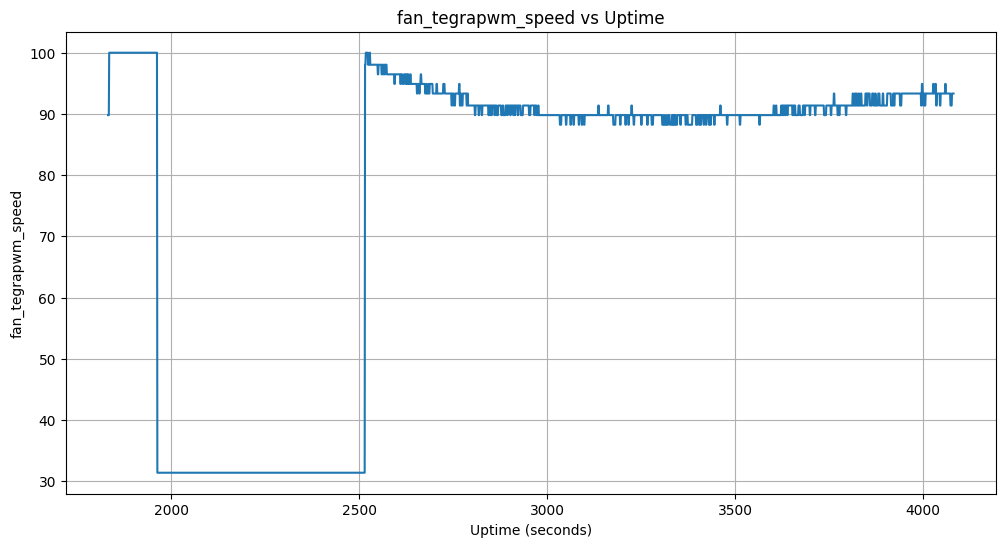

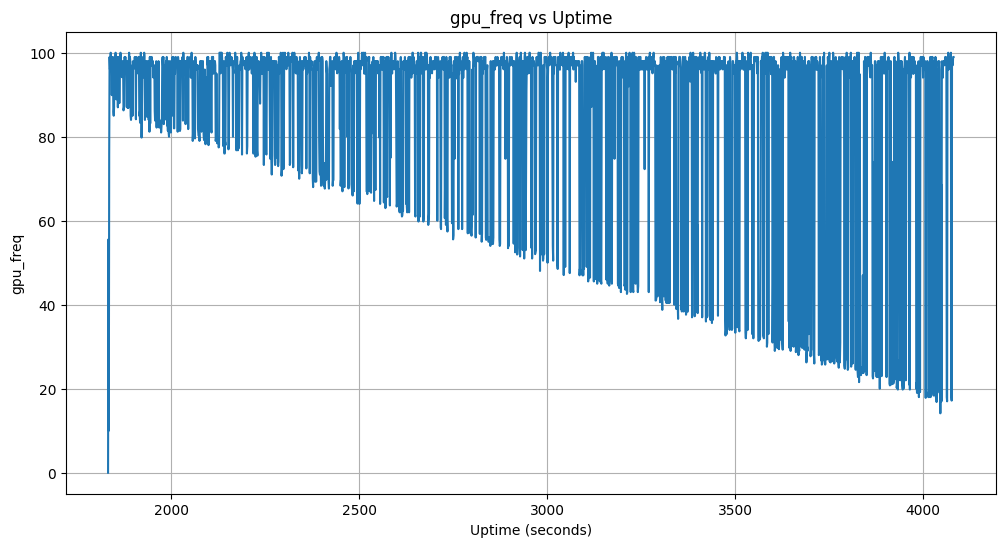

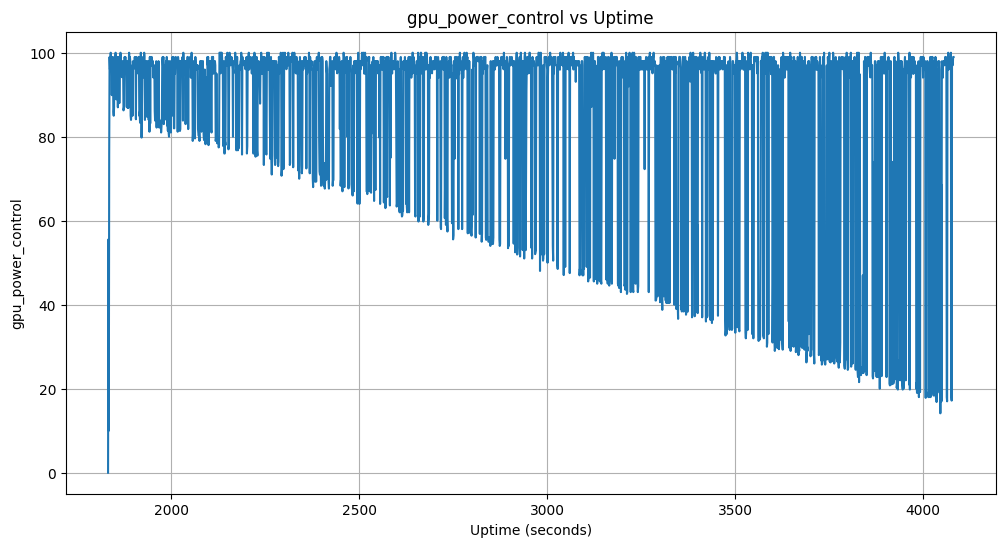

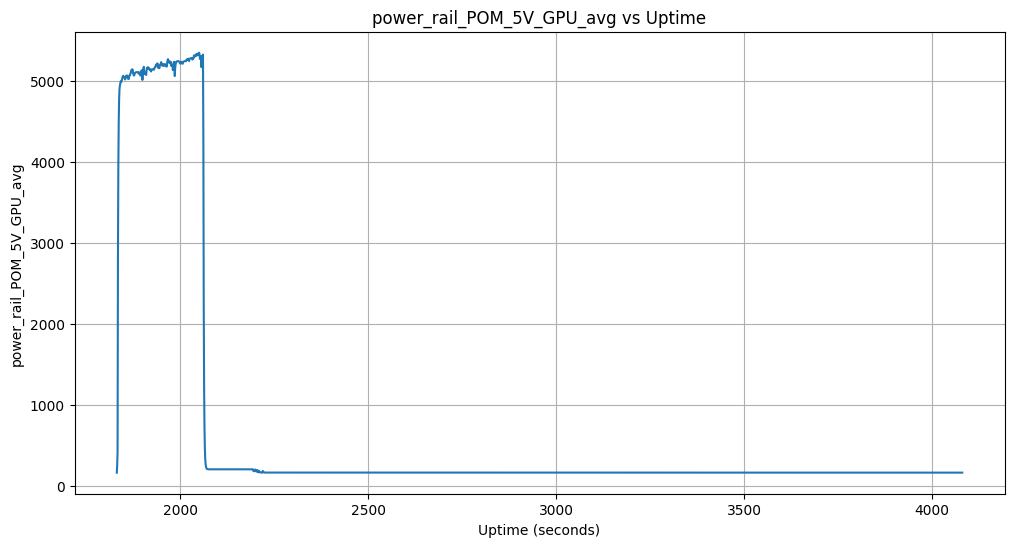

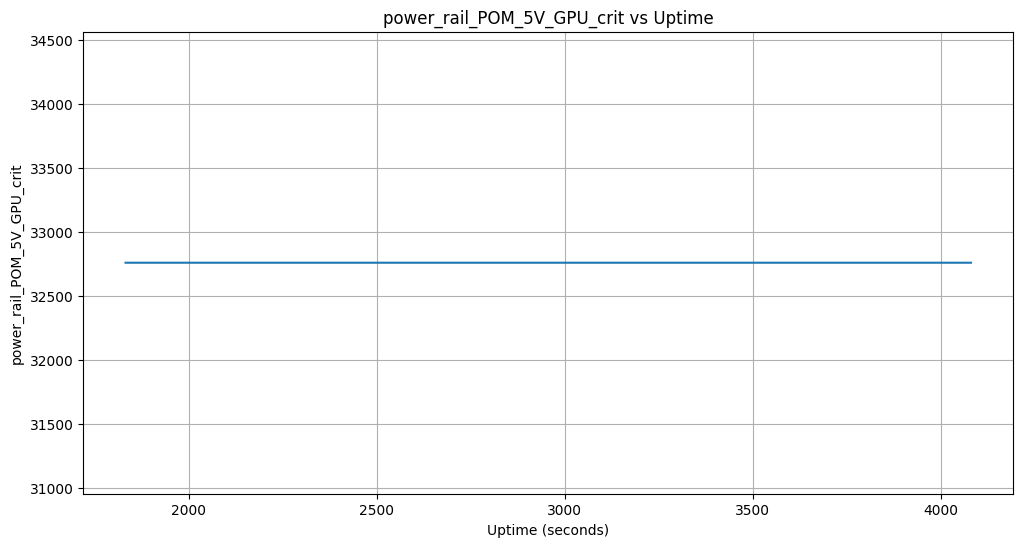

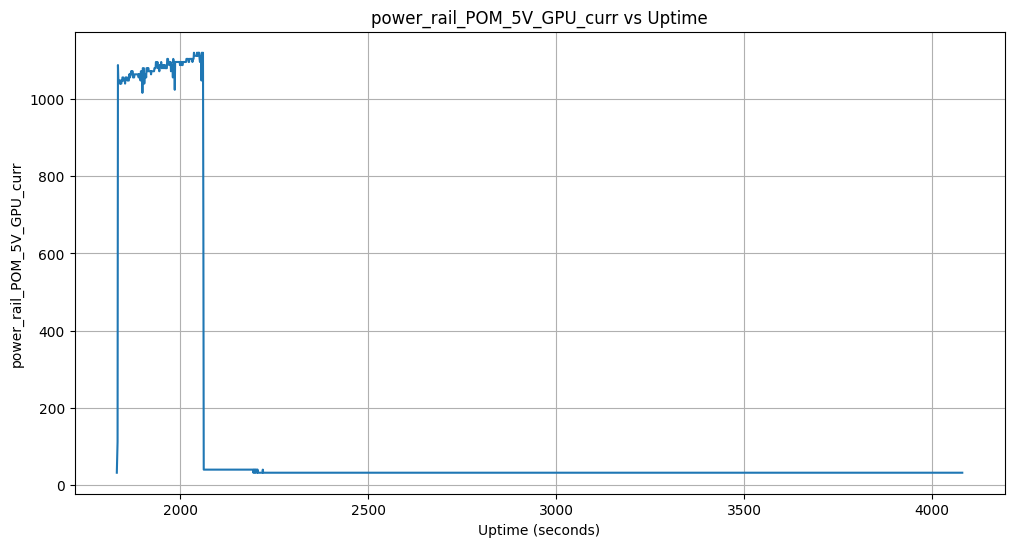

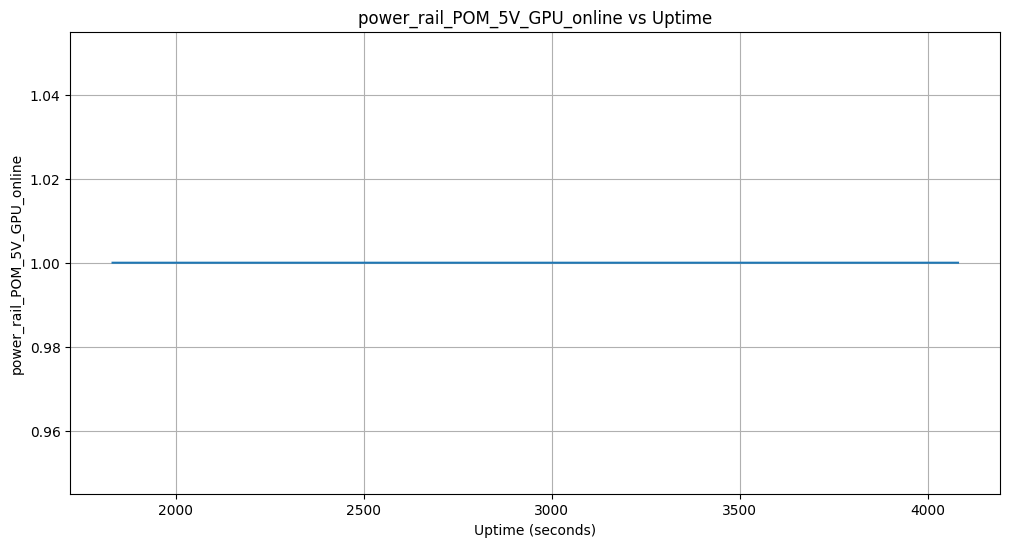

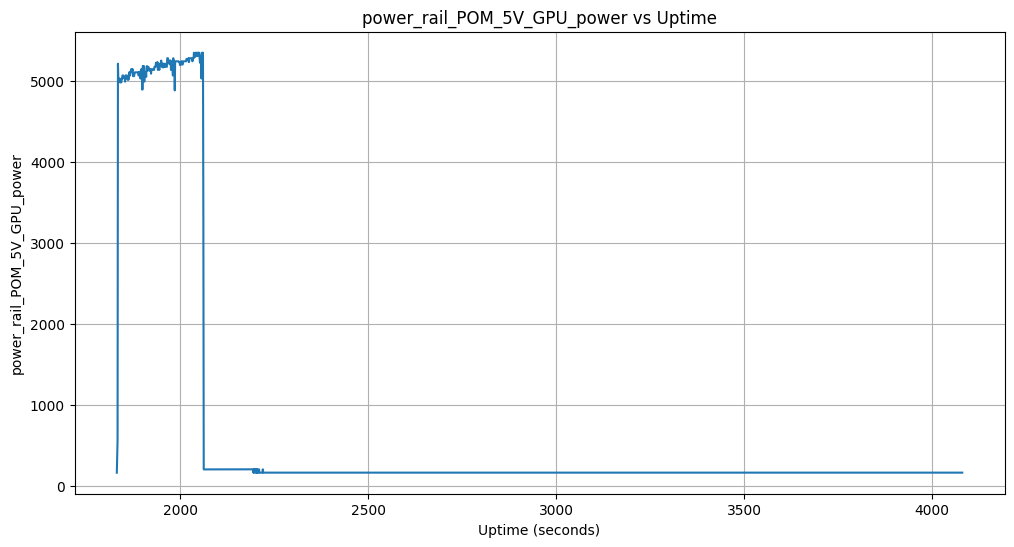

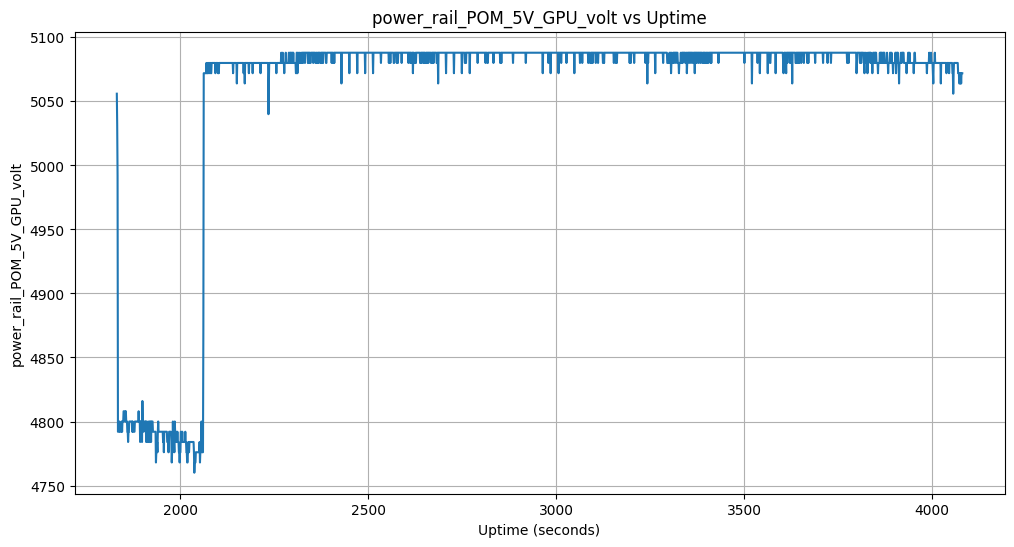

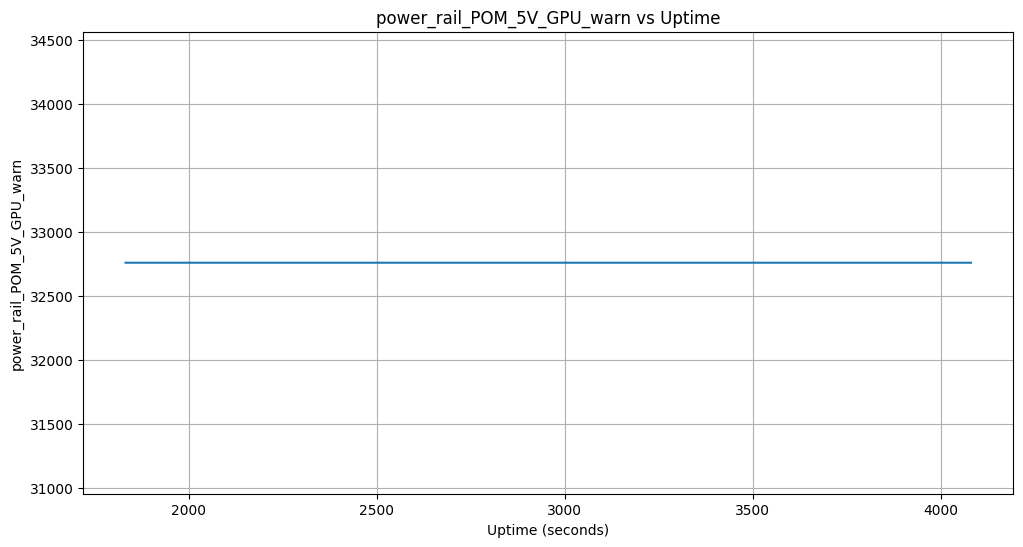

In [27]:
for column_name in ['fan_tegrapwm_speed', 'gpu_freq', 'gpu_power_control', 'power_rail_POM_5V_GPU_avg', 'power_rail_POM_5V_GPU_crit', 'power_rail_POM_5V_GPU_curr', 'power_rail_POM_5V_GPU_online', 'power_rail_POM_5V_GPU_power','power_rail_POM_5V_GPU_volt', 'power_rail_POM_5V_GPU_warn']:
    plot_column_against_uptime(df, column_name)